In [1]:
#first approach

In [129]:
import numpy as np
from sortedcontainers import SortedList

from keras.datasets import mnist

from builtins import print
import matplotlib.pyplot as plt











k-nearest neighbours

In [74]:
class knn(object):
    
    def __init__(self,k):
        self.k=k
        
    def fit(self,X,y):
        self.X =X
        self.y=y
        
        
        
    def predict(self,X):
        y = np.zeros(len(X)) #shape can be integer or tuple (int )  or ((int , int))
        for i,x in enumerate(X):
            sl = SortedList()
            for j,xt in enumerate(self.X):
                diff = x-xt
                d = diff.dot(diff)
                if(len(sl)<self.k):
                    sl.add((d,self.y[j]))
                    
                else:
                    if(d<sl[-1][0]):
                        del sl[-1]
                        sl.add((d,self.y[j]))
                        
                        
                        
            votes ={}
            
            max_votes =0
            max_votes_class=-1
            
            for _,v in sl:
                
                votes[v]=votes.get(v,0) + 1
                
                
            for v, count in votes.items():
                
                if(count>max_votes):
                    max_votes=count
                    
                    max_votes_class=v
                    
            y[i]=max_votes_class
            
            
        return y
    
    
    def score(self,X,y):
        p = self.predict(X)
        
        return np.mean(p==y)
    
    
    
    
    
    
                
                
                
                    
                
            
                    
                
        
        
    

In [83]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()
x_train = x_train/255
x_test =x_test/255

x_train1= x_train.reshape(-1,28*28)
x_test1= x_test.reshape(-1,28*28)

x_test1=x_test1[:1000,:]
x_train1=x_train1[:1000,:]



y_train1 =y_train[:1000]  
y_test1 =y_test[:1000]




#processing mnist data
    
    

    
    

    

bayes classifier

In [97]:
import numpy as np
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as nvm

In [105]:
class NaiveBayes(object):
    
    def fit(self,X,y,smoothing = 10e-3):
        self.gaussians = dict()
        self.priors= dict()
        labels = set(y)
        for c in labels:
            current_x = X[y==c]
            self.gaussians[c]={'mean':current_x.mean(axis=0),'var':np.var(current_x,axis=0)+smoothing}
            self.priors[c]= float(len(y[y==c]))/len(y)
            
            
            
    def score(self,X,y):
        p=self.predict(X)
        return np.mean(X==y)
    
    
    
    def predict(self,X):
        N,D =X.shape
        K =len(self.gaussians)
        p=np.zeros((N,K))
        
        for c,g in self.gaussians.items():
            mean , var = g['mean'],g['var']
            p[:,c]= nvm.logpdf(X,mean=mean,cov=var)+ np.log(self.priors[c])
            
            
        return np.argmax(p,axis=1)
    
    
    
        




        
        
        

non naive bayes

In [111]:
class BayesClassifier(object):
    
    def fit(self,X,y,smoothing =10e-3):
        self.gaussians= dict()
        self.priors =dict()
        lables = set(y)
        for c in labels:
            current_x = X[y==c]
            self.gaussians[c]={'mean': np.mean(current_x,axis=0),'var': np.cov(current_x.T)+ np.eye(D)*smoothing}
            self.priors[c]=float(len(y[y==c]))/len(y)
            
            
            
    def score(self,X,y):
        P= self.predict(X)
        
        return np.mean(P==y)
    
    
    
    
    
    
    
    def predict(self,X):
        
        N,D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N,K))
        
        for c ,g in self.gaussians.items():
            mean ,var = g['mean'],g['var']
            
            P[:,c]= nvm.logpdf(X,mean=mean,cov=var)+ np.log(self.priors[c])
            
        return np.argmax(P,axis=1)
    
    
            
    
    
    
    
    
    
        
        
    
    

perceptron learning algo


In [146]:
class perceptron(object):
    
    def fit(self,X,y,learning_rate =1.0,epochs =1000):
        D=X.shape[1]
        self.w=np.random.randn(D)
        self.b=0
        N=len(y)
        costs=[]
        
        for epoch in range(epochs):
            yhat = self.predict(X)
            incorrect = np.nonzero(y!=yhat)[0] #?????!!!!!!!!!
            if(len(incorrect)==0):
                break

            i = np.random.choice(incorrect)
            self.w += learning_rate*y[i]*X[i]
            self.b += learning_rate*y[i]
            
            c = len(incorrect)/float(N)
            costs.append(c)
            
        
        fig = plt.figure(figsize=(10,10))
        
        plt.plot(costs)
        plt.show()
            
    
        
        
    def predict(self,X):
        return np.sign(X.dot(self.w)+self.b)
    
    
    def score(self,X,y):
        p = self.predict(X)
        return np.mean(y!=p)
        
            

In [147]:
perceptron_ = perceptron()

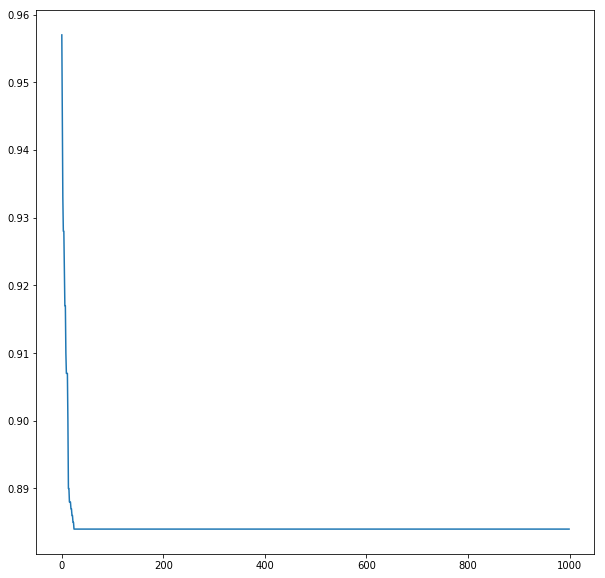

In [148]:
perceptron_.fit(x_train1,y_train1,learning_rate=10e-3)

0.884